https://stackoverflow.com/a/46553073/2713722

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract

ModuleNotFoundError: No module named 'matplotlib'

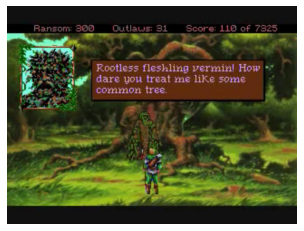

In [2]:
image = cv2.imread('./frames/frame11.png')
image = cv2.resize(image, None, fx=6, fy=6)

plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

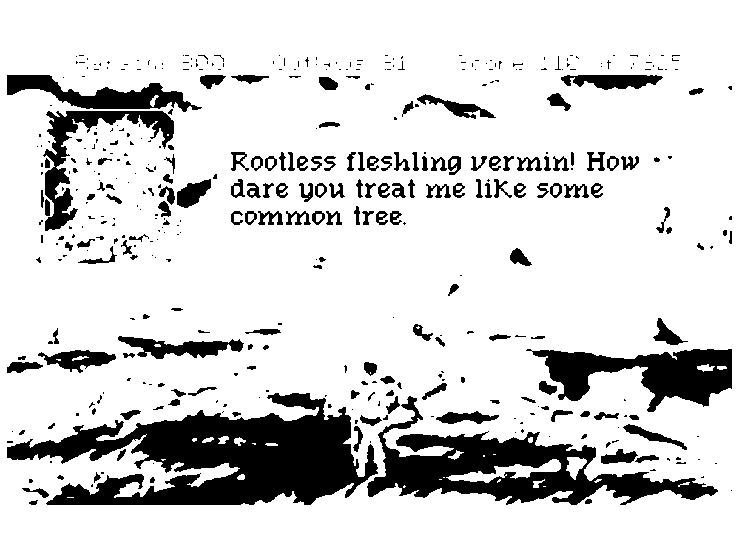

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize = (20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

In [4]:
print(pytesseract.image_to_string(thresh, config='--psm 4'))

Plea its =) pPhaitiaras = 4 0 TP oe 1440 ‘t ae

ate ee

we es were

en : oy Kootless fleshling vermin! How -°
wy ae dare you treat me like some
y-:, “2. common tree. 2

 
  

«
|
.


In [5]:
print(pytesseract.image_to_string(thresh))

_ Kootless fleshling vermin! How --
‘ dare you treat me like some
cornmmon tree.


In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=9)

In [7]:
cnts = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
len(cnts)

21

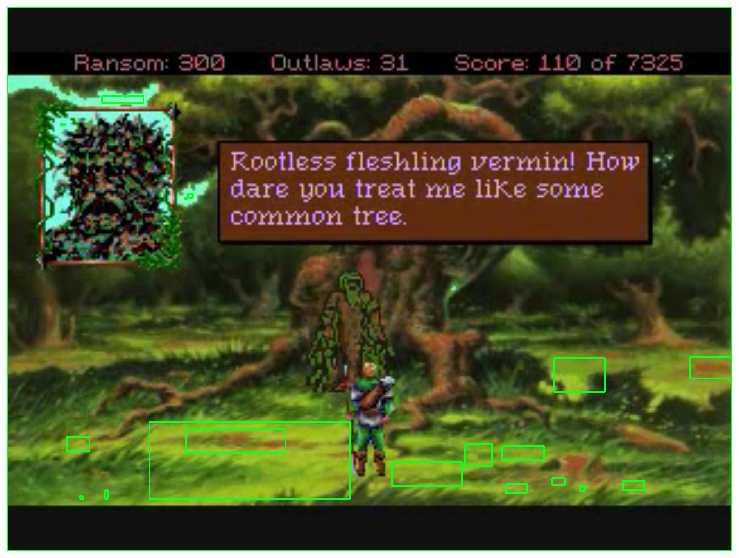

In [8]:
res = image.copy()
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(res, (x, y), (x + w, y + h), (36,255,12), 4)

plt.figure(figsize = (20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()